In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
msa_1995=pd.read_excel('/Users/michaelrosen/Desktop/AMB/msa_1995_jumbo.xlsx')

In [4]:
msa_2019=pd.read_excel('/Users/michaelrosen/Desktop/AMB/msa_2019_jumbo.xlsx')

In [5]:
msa_1995['name_lower']=msa_1995['FEDERAL-AID URBANIZED AREA'].str.lower()
msa_1995['name_final'] = msa_1995['name_lower'].str.split('-').str[0]
msa_1995['name']=msa_1995['name_final'].str.rstrip()

In [6]:
msa_2019['name_lower']=msa_2019['FEDERAL AID URBANIZED AREA'].str.lower()
msa_2019['name_strip'] = msa_2019['name_lower'].str.split('-').str[0]
msa_2019['name_final'] = msa_2019['name_strip'].str.split(',').str[0]
msa_2019['name'] = msa_2019['name_final'].replace(' ', '')

In [7]:
msa_1995.drop_duplicates(subset=['name'],inplace=True)

In [8]:
msa_2019.drop_duplicates(subset=['name'],inplace=True)

In [9]:
msa_1995 = msa_1995[msa_1995['TOTAL ESTIMATED FREEWAY LANE MILES'] != 0]
msa_2019 = msa_2019[msa_2019['TOTAL ESTIMATED FREEWAY LANE MILES'] != 0]

In [10]:
msajoin=msa_1995.merge(msa_2019,how='inner',on='name')

In [11]:
msajoin['LMgrowth']=(msajoin['TOTAL ESTIMATED FREEWAY LANE MILES_y']-msajoin['TOTAL ESTIMATED FREEWAY LANE MILES_x'])/(msajoin['TOTAL ESTIMATED FREEWAY LANE MILES_x'])
msajoin['PREDICTED_VMT']=msajoin['TOTAL FREEWAY DVMT (1,000)_x']*((1+msajoin['LMgrowth'])*1.03)

In [12]:
msajoin['Real_VMT_change']=(msajoin['TOTAL FREEWAY DVMT (1,000)_y']-msajoin['TOTAL FREEWAY DVMT (1,000)_x'])/msajoin['TOTAL FREEWAY DVMT (1,000)_x']

In [13]:
msajoin['Predicted_VMT_change']=(msajoin['PREDICTED_VMT']-msajoin['TOTAL FREEWAY DVMT (1,000)_x'])/msajoin['TOTAL FREEWAY DVMT (1,000)_x']

In [14]:
msa_slim=msajoin[(msajoin['Real_VMT_change'] <= 5)]

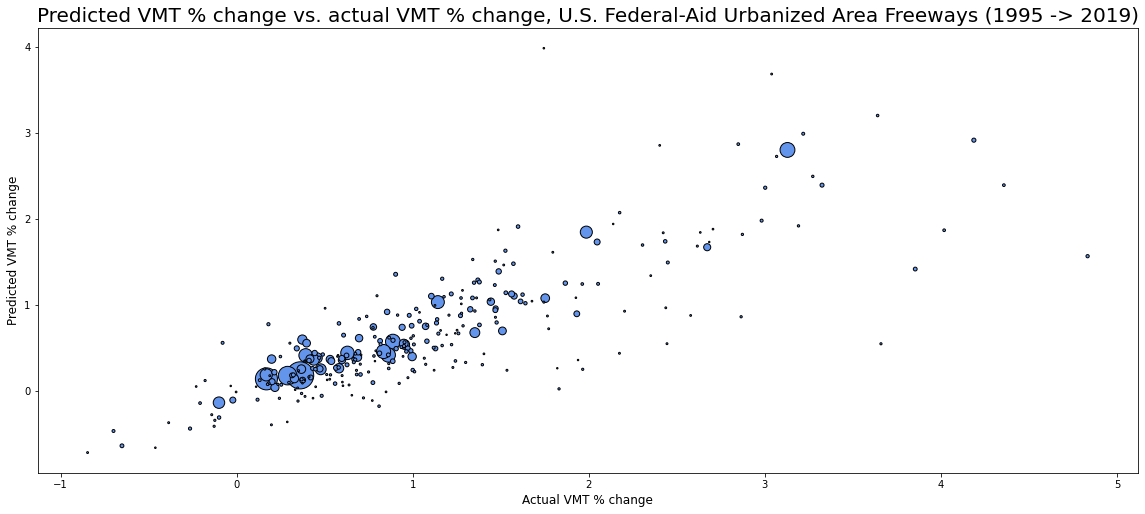

In [20]:
msa_slim.plot(
    x=['Real_VMT_change'], 
    y=['Predicted_VMT_change'], 
    kind='scatter', 
    figsize=(16, 8),
    c='cornflowerblue',
    s=(msa_slim['ESTIMATED POPULATION (1,000)_y']*0.00004),
    edgecolor='black',
    linewidth=1
)
                
plt.title(label="Predicted VMT % change vs. actual VMT % change, U.S. Federal-Aid Urbanized Area Freeways (1995 -> 2019)",
          fontsize=20,
          color="black",)
plt.xlabel('Actual VMT % change', fontsize=12)
plt.ylabel('Predicted VMT % change', fontsize=12)
plt.tight_layout()
plt.subplots_adjust(top=0.85)